In [15]:
import pandas as pd
import numpy as np
import random
import scipy.stats
import math
import seaborn as sns
from matplotlib import pyplot as plt
from random import sample
from scipy.stats import chisquare
from scipy.stats import geom
from scipy.stats import t
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib.ticker import AutoMinorLocator
%matplotlib inline

In [16]:
'''8.37 True / False. Determine if the following statements are true or false. If false, explain why.
(a) A correlation coefficient of -0.90 indicates a stronger linear relationship than a correlation of 0.5.
(b) Correlation is a measure of the association between any two variables.'''
print('''a) true.
b) false. only numerical variables.''')

a) true.
b) false. only numerical variables.


In [17]:
'''8.38 Trees. The scatterplots below show the relationship between height, diameter, and volume of timber
in 31 felled black cherry trees. The diameter of the tree is measured 4.5 feet above the ground.
(a) Describe the relationship between volume and height of these trees.
(b) Describe the relationship between volume and diameter of these trees.
(c) Suppose you have height and diameter measurements for another black cherry tree. Which of these
variables would be preferable to use to predict the volume of timber in this tree using a simple linear
regression model? Explain your reasoning.'''
print(f'''a) moderate positive linear relationship
b) strong positive linear relationship
c) diameter. the variability is low, diameter looks more correlated with volume of a tree than height. diameter should
have a bigger correlation coefficient. diameter would predict volume more reliably.''')

a) moderate positive linear relationship
b) strong positive linear relationship
c) diameter. the variability is low, diameter looks more correlated with volume of a tree than height. diameter should
have a bigger correlation coefficient. diameter would predict volume more reliably.


In [32]:
'''8.39 Husbands and wives, Part III. Exercise 8.33 presents a scatterplot displaying the relationship between
husbands' and wives' ages in a random sample of 170 married couples in Britain, where both partners' ages
are below 65 years. Given below is summary output of the least squares fit for predicting wife's age from
husband's age.
(a) We might wonder, is the age difference between husbands and wives consistent across ages? If this were
the case, then the slope parameter would be beta_1 = 1. Use the information above to evaluate if there is
strong evidence that the difference in husband and wife ages differs for different ages.
(b) Write the equation of the regression line for predicting wife's age from husband's age.
(c) Interpret the slope and intercept in context.
(d) Given that R2 = 0.88, what is the correlation of ages in this data set?
(e) You meet a married man from Britain who is 55 years old. What would you predict his wife's age to
be? How reliable is this prediction?
(f) You meet another married man from Britain who is 85 years old. Would it be wise to use the same
linear model to predict his wife's age? Explain.'''

print(f'''a) if the age difference between husbands and wives are consistent across ages, the slope of the
regression line would be 1. To test this claim, we can set hypotheses: H0: beta_1 = 1, HA: beta_1 != 0
t_score: (.9112 - 1) / .0259 = {(.9112 - 1) / .0259:.4f}
{stats.t.cdf(x= (.9112 - 1) / .0259, df=168) * 2:.4f} # two tailed p-value of corresponding t-score
b) age_wife = 1.5740 + .9112 * age_husband
c) for each additional year in husband's age, the model predicts an additional 0.9112 years in wife's age.
d) since R^2 is high, there's a strong correlation of ages in this data set.
e) would be {1.5740 + .9112 * 55} years old. that would be reliable because there's a high correlation between the variables.
f) no. observation is out of the data's realm. this would require extrapolation.''')

a) if the age difference between husbands and wives are consistent across ages, the slope of the
regression line would be 1. To test this claim, we can set hypotheses: H0: beta_1 = 1, HA: beta_1 != 0
t_score: (.9112 - 1) / .0259 = -3.4286
0.0008 # two tailed p-value of corresponding t-score
b) age_wife = 1.5740 + .9112 * age_husband
c) for each additional year in husband's age, the model predicts an additional 0.9112 years in wife's age.
d) since R^2 is high, there's a strong correlation of ages in this data set.
e) would be 51.69 years old. that would be reliable because there's a high correlation between the variables.
f) no. observation is out of the data's realm. this would require extrapolation.


a) hypotheses:
H0: the true slope coefficient for predicting heart weight from body weight of cats is 0. there's no association between
the two variables.
HA: the true slope coefficient for predicting heart weight from body weight of cats is different from 0. there's no association 
between the two variables.
b) since p value = 0.000 is smaller than our significance level of 5%, we reject the null hypothesis and conclude 
the data provide strong evidence that the average number of traffic accident is significantly different between two dates.

c) CONFIDENCE INTERVAL
standard error = 0.2500, me = 0.4942, dof = 143, t_conf = 1.9767
we're 95% confident that the true slope coefficient for predicting heart weight from body weight of cats 
is between 3.5398 and 4.5282
d) yes. because there's no 0 within the confidence interval, we can say both results from confidence interval and hypothesis
test agrees.



C:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\patches.py:121: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


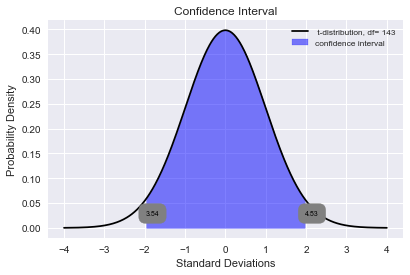

In [64]:
'''8.40 Cats, Part II. Exercise 8.26 presents regression output from a model for predicting the heart weight
(in g) of cats from their body weight (in kg). The coefficients are estimated using a dataset of 144 domestic
cat. The model output is also provided below.
(a) We see that the point estimate for the slope is positive. What are the hypotheses for evaluating whether
body weight is positively associated with heart weight in cats?
(b) State the conclusion of the hypothesis test from part (a) in context of the data.
(c) Calculate a 95% confidence interval for the slope of body weight, and interpret it in context of the data.
(d) Do your results from the hypothesis test and the confidence interval agree? Explain.'''

b0 = -0.357
s_b0 = .692
t_b0 = -.515

b1 = 4.034
s_b1 = .250
t_b1 = 16.119

x0 = 0
xbar = b1
se = s_b1
dof = 143
cl = .95
sl = 1-cl

t = (xbar - x0) / se # compute t-score
two_t = [t,t*(-1)] # t-scores for right and left tail
p1t = stats.t.cdf(x=min(two_t), df=dof) # one tail probability -left tail-
p = stats.t.cdf(x=min(two_t), df=dof) * 2 # two tailed p-value of corresponding t-score


print(f'''a) hypotheses:
H0: the true slope coefficient for predicting heart weight from body weight of cats is 0. there's no association between
the two variables.
HA: the true slope coefficient for predicting heart weight from body weight of cats is different from 0. there's no association 
between the two variables.
b) since p value = {p:.3f} is smaller than our significance level of {sl:.0%}, we reject the null hypothesis and conclude 
the data provide strong evidence that the average number of traffic accident is significantly different between two dates.
''')

# CONFIDENCE INTERVAL
fig = plt.figure(figsize=(14,4))
x = np.linspace(-4, 4, 500)
s1t = sl / 2
t_conf = stats.t.ppf(1-s1t, dof) # upper tail is 1 - confidence level /2 (one tail)
se = s_b1
me = t_conf * se
lo = xbar - me
hi = xbar + me
print(f'''c) CONFIDENCE INTERVAL
standard error = {se:.4f}, me = {me:.4f}, dof = {dof}, t_conf = {t_conf:.4f}
we're {cl:.0%} confident that the true slope coefficient for predicting heart weight from body weight of cats 
is between {lo:.4f} and {hi:.4f}
d) yes. because there's no 0 within the confidence interval, we can say both results from confidence interval and hypothesis
test agrees.
''')

ax_conf = fig.add_subplot(1,2,2)
y = stats.t.pdf(x, dof)
two_t_conf = [t_conf, (t_conf)*-1]

ax_conf.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax_conf.fill_between(x, y, color='blue', alpha=0.5, where= ~((x<min(two_t_conf)) | (x>max(two_t_conf))) ,label="confidence interval")
ax_conf.set_ylabel('Probability Density')
ax_conf.set_xlabel('Standard Deviations')
ax_conf.set_title('Confidence Interval')
ax_conf.text(min(two_t_conf), stats.t.cdf(x=min(two_t_conf), df=dof), '{t_lo:.2f}'.format(t_lo=lo), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')
ax_conf.text(max(two_t_conf), stats.t.cdf(x=min(two_t_conf), df=dof), '{t_hi:.2f}'.format(t_hi=hi), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')
legend = ax_conf.legend(shadow=True,fontsize='small')

In [66]:
'''8.41 Nutrition at Starbucks, Part II. Exercise 8.22 introduced a data set on nutrition information on
Starbucks food menu items. Based on the scatterplot and the residual plot provided, describe the relationship
between the protein content and calories of these menu items, and determine if a simple linear model is
appropriate to predict amount of protein from the number of calories.'''
print('''moderate to strong, positive, linear relationship between the variables. there's an upwards trend. but the residuals
seems to grow for bigger x values.
there might be two clusters, left and right. 
might not be suitable to fit a regression line here.''')

moderate to strong, positive, linear relationship between the variables. there's an upwards trend. but the residuals
seems to grow for bigger x values.
there might be two clusters, left and right. 
might not be suitable to fit a regression line here.


In [88]:
'''8.42 Helmets and lunches. The scatterplot shows the relationship between socioeconomic status measured
as the percentage of children in a neighborhood receiving reduced-fee lunches at school (lunch) and the
percentage of bike riders in the neighborhood wearing helmets (helmet). The average percentage of children
receiving reduced-fee lunches is 30.8% with a standard deviation of 26.7% and the average percentage of
bike riders wearing helmets is 38.8% with a standard deviation of 16.9%.
(a) If the R2 for the least-squares regression line for
these data is 72%, what is the correlation
between lunch and helmet?
(b) Calculate the slope and intercept for the
least-squares regression line for these data.
(c) Interpret the intercept of the least-squares
regression line in the context of the application.
(d) Interpret the slope of the least-squares regression
line in the context of the application.
(e) What would the value of the residual be for a
neighborhood where 40% of the children receive
reduced-fee lunches and 40% of the bike riders
wear helmets? Interpret the meaning of this
residual in the context of the application.'''
ybar = 38.8
s_y = 16.9

xbar = 30.8
s_x = 26.7

R = -np.sqrt(0.72)
b1 = s_y/s_x * R
b0 = ybar - (b1*xbar)

print(f'''a) {R:.2f}
b) beta_1 = {b1:.2f} --- beta_0 = {b0:.2f}
c) a neighborhood with a reduced feed lunch rate of 0 percent is expected to have a 55.34% rate of bike riders wearing helmet
d) for additional reduced feed lunch rate, the model predicts a {b1:.2f}% change in bike riders wearing helmet
e) the model fit have predicted the bike riders wearing helmet from reduced feed lunch rate {(b0 + b1*40) - 40:.3f} less''')

a) -0.85
b) beta_1 = -0.54 --- beta_0 = 55.34
c) a neighborhood with a reduced feed lunch rate of 0 percent is expected to have a 55.34% rate of bike riders wearing helmet
d) for additional reduced feed lunch rate, the model predicts a -0.54% change in bike riders wearing helmet
e) the model fit have predicted the bike riders wearing helmet from reduced feed lunch rate -6.141 less


In [89]:
'''8.43 Match the correlation, Part III. Match each correlation to the corresponding scatterplot.'''
print('''(a) r = 0.72  - 2
(b) r = 0.07  - 4
(c) r = 0.86  - 1
(d) r = 0.99  - 3''')

(a) r = 0.72  - 2
(b) r = 0.07  - 4
(c) r = 0.86  - 1
(d) r = 0.99  - 3


In [96]:
'''8.44 Rate my professor. Many college courses conclude by giving students the opportunity to evaluate
the course and the instructor anonymously. However, the use of these student evaluations as an indicator of
course quality and teaching effectiveness is often criticized because these measures may reflect the influence
of non-teaching related characteristics, such as the physical appearance of the instructor. Researchers at
University of Texas, Austin collected data on teaching evaluation score (higher score means better) and
standardized beauty score (a score of 0 means average, negative score means below average, and a positive
score means above average) for a sample of 463 professors.21 The scatterplot below shows the relationship
between these variables, and regression output is provided for predicting teaching evaluation score from
beauty score.
(a) Given that the average standardized beauty
score is -0.0883 and average teaching
evaluation score is 3.9983, calculate the
slope. Alternatively, the slope may be
computed using just the information
provided in the model summary table.
(b) Do these data provide convincing evidence
that the slope of the relationship between
teaching evaluation and beauty is positive?
Explain your reasoning.
(c) List the conditions required for linear
regression and check if each one is satised
for this model based on the following
diagnostic plots.'''

b1 = (3.9983 - 4.010)/-.0883

print(f'''a) {b1}
b) yes, the data provide convincing evidence that the slope of the relationship between teaching evaluation and beauty is
positive. since the p-value in the regression output is approximately 0, we fail to reject the null hypothesis because in the
realm that H0 is true, it's almost impossible that we observe that value. so it's beyond our level of "probable" then we reject
the H0 and say this is something impossible enough that we can't accept.
c) linearity. can't see an evident non-linear trend in the data. this condition is met.
nearly normal residuals. the residuals looks like they're normally distributed.
constant variability. variability of the observations looks constant for every value of x
independent observations. order of data collection seems completely random. there's no time series etc.''')

a) 0.13250283125707613
b) yes, the data provide convincing evidence that the slope of the relationship between teaching evaluation and beauty is
positive. since the p-value in the regression output is approximately 0, we fail to reject the null hypothesis because in the
realm that H0 is true, it's almost impossible that we observe that value. so it's beyond our level of "probable" then we reject
the H0 and say this is something impossible enough that we can't accept.
c) linearity. can't see an evident non-linear trend in the data. this condition is met.
nearly normal residuals. the residuals looks like they're normally distributed.
constant variability. variability of the observations looks constant for every value of x
independent observations. order of data collection seems completely random. there's no time series etc.

